# Activation and Output Functions
In this exercise, you'll explore how activation functions and output functions impact the ability of neural networks to learn. 

Most of the code will be provided for you, and you'll have to fill in the blanks! 
Consider trying a few different combinations of activation functions to get a better idea of how the activation function impacts training.

In [1]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

##### Loading Data
We use the [CIFAR-10](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html#torchvision.datasets.CIFAR10) dataset from the `torchvision` module and wrap the training and test datasets in a DataLoader. 

We also create a `train_network` function that takes a PyTorch neural network, a train DataLoader, and a test DataLoader.

This code has been provided for you.

##### CIFAR-10: A Fundamental Dataset in Computer Vision

CIFAR-10 is one of the most widely used benchmark datasets in the field of computer vision and machine learning. The name "CIFAR" stands for the Canadian Institute For Advanced Research, which supported the research team that created this dataset.

##### Dataset Composition and Structure

The CIFAR-10 dataset consists of 60,000 color images, each 32×32 pixels in size. These images are divided into 10 distinct classes, with 6,000 images per class. The dataset is typically split into 50,000 training images and 10,000 test images.

The 10 classes in CIFAR-10 are:
1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

Unlike the MNIST dataset (which contains grayscale handwritten digits), CIFAR-10 includes color images of real-world objects, making it more challenging and representative of practical computer vision problems.

##### Accessing CIFAR-10 in PyTorch

In PyTorch, the CIFAR-10 dataset is conveniently available through the `torchvision.datasets` module. Here's how you would typically load it:

```python
import torch
import torchvision
import torchvision.transforms as transforms

# Define transformations (normalization, augmentation, etc.)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load training set
trainset = torchvision.datasets.CIFAR10(
    root='./data',           # Directory to store the dataset
    train=True,              # Specify that we want the training split
    download=True,           # Download if not already present
    transform=transform      # Apply the transformations
)

# Create a data loader for batched processing
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=4,            # Process 4 images at a time
    shuffle=True,            # Randomize the order of samples
    num_workers=2            # Use 2 subprocesses for data loading
)

# Similarly for the test set
testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True, 
    transform=transform
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=4,
    shuffle=False,
    num_workers=2
)
```

##### Historical Significance and Usage

Created by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton in 2009, CIFAR-10 has become a standard benchmark for evaluating image classification algorithms. Its relatively small image size makes it computationally manageable while still presenting meaningful challenges.

Researchers often use CIFAR-10 to:
- Develop and test new neural network architectures
- Benchmark the performance of different optimization algorithms
- Evaluate regularization techniques
- Demonstrate transfer learning approaches
- Explore data augmentation strategies

##### Challenges Presented by CIFAR-10

Despite being smaller than more recent datasets like ImageNet, CIFAR-10 presents several meaningful challenges:

1. The images are low-resolution (32×32 pixels), which limits the visible details
2. Objects appear in various orientations, positions, and scales
3. Background clutter and occlusion are common
4. Some classes are visually similar (e.g., automobile vs. truck, or cat vs. dog)
5. Lighting conditions vary across images

These challenges make CIFAR-10 an excellent stepping stone between simpler datasets like MNIST and more complex ones like ImageNet.

##### Performance Benchmarks

Over the years, performance on CIFAR-10 has improved dramatically:
- Early convolutional networks achieved around 80% accuracy
- Modern architectures can exceed 99% accuracy, approaching human-level performance

This progression reflects the rapid advancement of deep learning techniques in computer vision over the past decade.

##### Relationship to Other CIFAR Datasets

CIFAR-10 has a sister dataset called CIFAR-100, which contains 100 classes with 600 images each. These classes are grouped into 20 superclasses. CIFAR-100 presents a more challenging classification task due to the finer-grained distinctions between classes and fewer examples per class.

Together, these datasets have played a crucial role in advancing the field of computer vision and continue to serve as important benchmarks for evaluating new algorithms and techniques.

In [3]:
# Establish our transform
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load train and test datasets
training_data = datasets.CIFAR10(root="data", train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root="data", train=False, download=True, transform=transform)

# Create the training and test dataloaders with a batch size of 32
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)

100%|██████████| 170498071/170498071 [03:47<00:00, 749658.44it/s] 


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


Let me break it down with a concrete MNIST example:

1. The neural network outputs raw scores (logits) for each digit (0-9). For a batch of 2 images, the output might look like:

```python
outputs = torch.tensor([[2.1, -1.3, 0.5, ..., 1.2],  # Image 1
                      [0.3, 3.2, -0.7, ..., 2.1]])  # Image 2
```

2. `torch.max(outputs.data, 1)` finds:
   • The maximum value in each row (dimension 1)
   • Its index (which corresponds to the predicted digit)

3. For our example:
   • First image max might be at index 0 → predicts "0"
   • Second image max at index 1 → predicts "1"

4. The function returns both values and indices, but we only keep the indices (`preds`) with `_` discarding the values.

Visualization:

```
Image 1 scores: [2.1, -1.3, 0.5, ...] → max at position 0 → predict "0"
Image 2 scores: [0.3, 3.2, -0.7, ...] → max at position 1 → predict "1"
```

The predicted digit is simply whichever position (0-9) has the highest score.

In [4]:
# In this context, net refers to the neural network model that will be trained. It's typically an instance of a PyTorch nn.Module class that defines:
# - The network architecture (layers, activation functions)
# - The forward pass logic
# - Any custom methods for initialization or operations
def train_network_classification(net, train_loader, test_loader):
    num_epochs = 10
    
    # We'll use Negative Log Likelihood Loss as our objective function here. Leave it fixed for now.
    criterion = nn.NLLLoss()

    # Don't worry about the choice of optimizer here. Leave it fixed for now.
    optimizer = optim.SGD(mlp.parameters(), lr=0.005, momentum=0.9)
    
    # Establish a list for our history
    train_loss_history = list()
    val_loss_history = list()

    for epoch in range(num_epochs):
        net.train()
        train_loss = 0.0
        train_correct = 0
        for i, data in enumerate(train_loader):
            # data is a list of [inputs, labels]
            inputs, labels = data
            
            # Pass to GPU if available.
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            optimizer.zero_grad()
            
            # Forward pass: Compute predicted outputs by passing inputs to the model
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            
            # Computes gradients (derivatives) of the loss with respect to all trainable parameters (weights)
            loss.backward()
            
            # Updates the model's parameters based on the computed gradients
            optimizer.step()
            
            _, preds = torch.max(outputs.data, 1)
            train_correct += (preds == labels).sum().item()
            train_loss += loss.item()
            
        print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
        train_loss_history.append(train_loss)

        
        val_loss = 0.0
        val_correct = 0
        net.eval()
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
        
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            
            _, preds = torch.max(outputs.data, 1)
            val_correct += (preds == labels).sum().item()
            val_loss += loss.item()
            
        print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
        val_loss_history.append(val_loss)           

    plt.plot(train_loss_history, label="Training Loss")
    plt.plot(val_loss_history, label="Validation Loss")
    plt.legend()
    plt.show()
    
def train_network_regression(net, train_loader, test_loader):
    num_epochs = 10
    
    criterion = nn.L1Loss(reduction='sum')

    # Don't worry about the choice of optimizer here. Leave it fixed for now.
    optimizer = optim.SGD(mlp.parameters(), lr=0.05)
    
    # Establish a list for our history
    train_loss_history = list()
    val_loss_history = list()

    for epoch in range(num_epochs):
        net.train()
        train_loss = 0.0
        for i, data in enumerate(train_loader):
            # data is a list of [inputs, labels]
            inputs, labels = data
            
            # Pass to GPU if available.
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            train_loss += loss.item()
        print(f'Epoch {epoch + 1} training loss: {train_loss/len(train_loader):.5f}')
        train_loss_history.append(train_loss)

        
        val_loss = 0.0
        net.eval()
        for inputs, labels in test_loader:
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()
            
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item()
        print(f'Epoch {epoch + 1} validation loss: {val_loss/len(test_loader):.5f}')
        val_loss_history.append(val_loss)           

    plt.plot(train_loss_history, label="Training Loss")
    plt.plot(val_loss_history, label="Validation Loss")
    plt.legend()
    plt.show()

##### Neural Network Training: Classification vs. Regression

Neural networks can solve various types of problems, but two fundamental categories stand out: classification and regression. Understanding the differences in how we train these networks provides essential insight into the architecture of machine learning systems.

##### Problem Types and Their Training Functions

Classification and regression represent two distinct paradigms in supervised learning, each requiring specialized training approaches:

##### Classification Networks
Classification involves predicting discrete categories or classes. For instance, in the MNIST dataset, the network predicts which digit (0-9) an image represents. The `train_network_classification` function is specifically designed for such tasks where the output belongs to one of several distinct categories.

##### Regression Networks
Regression, by contrast, predicts continuous numerical values. Examples include predicting house prices, temperature forecasts, or stock market values. The `train_network_regression` function handles these cases where the output is a continuous value rather than a discrete category.

##### Loss Functions: Measuring Prediction Quality

The loss function quantifies how far the network's predictions deviate from the actual values:

##### For Classification
Classification tasks typically use Negative Log Likelihood (NLLLoss), which penalizes the network based on how confidently it predicts the correct class. This loss function works with probability distributions across different classes and is particularly effective for multi-class problems.

##### For Regression
Regression tasks commonly employ Mean Absolute Error (L1Loss), which measures the average absolute difference between predicted and actual values. This approach is appropriate when the output is a continuous numerical value rather than a category.

##### Performance Metrics: Tracking Training Progress

How we measure success differs significantly between these training functions:

##### Classification Metrics
Classification networks track both accuracy and loss. Accuracy measures the percentage of correctly classified examples, calculated with code like:
```python
train_correct += (preds == labels).sum().item()  # Accuracy calculation
```
This metric is intuitive for classification—it simply tells us how often the network is right.

##### Regression Metrics
Regression networks primarily track loss values, as the concept of "accuracy" doesn't translate directly to continuous outputs. There's no binary "correct" or "incorrect" prediction when forecasting continuous values—only degrees of error.

##### Output Processing: From Raw Outputs to Predictions

The way networks transform their raw outputs into final predictions differs:

##### Classification Output Handling
Classification networks output raw scores (logits) for each possible class. The prediction is determined by finding which class has the highest score using `torch.max()`. This function returns both the maximum value and its index, with the index corresponding to the predicted class.

##### Regression Output Handling
Regression networks produce raw numerical values that are directly compared to the target values. No additional processing like `torch.max()` is needed, as the output itself is the prediction.

##### Optimization Differences

Training parameters are also tailored to each problem type:

##### Classification Optimization
Classification typically uses:
- Momentum (0.9) to help navigate complex loss landscapes
- Lower learning rate (0.005) for more stable convergence

##### Regression Optimization
Regression often employs:
- Higher learning rate (0.05) for faster convergence
- No momentum, favoring simpler optimization strategies

##### GPU Resource Management

Modern deep learning relies heavily on GPU acceleration, with different approaches to device management:

##### Classification GPU Handling
The older `.cuda()` approach is common in classification implementations, explicitly moving tensors to the GPU.

##### Regression GPU Handling
The more modern `.to(device)` pattern is prevalent in regression implementations, offering greater flexibility by abstracting the specific device (CPU, GPU, or other accelerators).

##### Conceptual Foundation: Categories vs. Continuums

The fundamental distinction between these training functions reflects a deeper conceptual divide in how we model the world. Classification carves reality into discrete categories, while regression captures continuous spectrums of values. Each approach requires different mathematical tools, evaluation metrics, and optimization strategies.

Despite these differences, both training functions share a common core structure: they iterate through batches of data, compute predictions and losses, and update the network's parameters through backpropagation. The differences lie in how they handle the specific nature of their respective problem types.

This understanding of the distinctions between classification and regression training functions forms a crucial foundation for developing effective neural network solutions across diverse problem domains.

## Defining a Neural Network
The first model we establish is a fully-connected neural network -- a multi-layer perceptron. 
You will specify the activation and output function for the network based on the task -- a 10-class image classification task.

If you need to, consult the [PyTorch documentation](https://pytorch.org/docs/stable/nn.functional.html#non-linear-activation-functions) for the activation and output function options available to you.

**NOTE:** When choosing your activation and output functions, omit the parentheses in the assignment to the class property.

Here's the OCR text from the image:

Here's the explanation of the `CIFAR_MLP` class and the `32*32*3` input dimension:

Network Architecture Explanation:
1. Input Layer (`fc1`):
   • Takes flattened CIFAR-10 images (32×32 pixels × 3 RGB channels)
   • Outputs 120 features through ReLU activation

2. Hidden Layer (`fc2`):
   • Takes 120 inputs from previous layer
   • Outputs 84 features through ReLU activation

3. Output Layer (`fc3`):
   • Takes 84 inputs
   • Outputs 10 class scores (for CIFAR-10's 10 categories)
   • Uses log-softmax for classification probabilities

Why `32*32*3`:

This represents the flattened dimensions of CIFAR-10 images:

• `32*32`: Each image is 32 pixels wide × 32 pixels tall
• `*3`: 3 color channels (Red, Green, Blue)

The multiplication is written explicitly (`32*32*3` instead of `3072`) because:
1. Readability: Clearly shows the image dimensions
2. Maintainability: Easier to modify if input size changes
3. Self-documenting: Immediately tells readers it's handling 32×32 RGB images

Complete Forward Pass Flow:
1. Input image (3,32,32) → Flatten to (3072,)
2. FC1: 3072 → 120 (ReLU)
3. FC2: 120 → 84 (ReLU)
4. FC3: 84 → 10 (LogSoftmax)

The network is designed specifically for CIFAR-10's image dimensions and class count.

In [5]:
class CIFAR_MLP(nn.Module):

    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.output = F.log_softmax
        self.fc1 = nn.Linear(32 * 32 * 3, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.output(self.fc3(x), dim=1)
        return x

# Do not change the name of your model or later cells may fail!
mlp = CIFAR_MLP()
mlp.to(device)

CIFAR_MLP(
  (fc1): Linear(in_features=3072, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# Now let's train our network!
train_network_classification(mlp, train_loader, test_loader)

## Regression Tasks
In a regession task, we'll need to think about something else -- our same model may not work! 
For this task, we'll use the [California Housing Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html).

Again, if you get stuck on your choices of activation function, check out [the documentation](https://pytorch.org/docs/stable/nn.functional.html#non-linear-activation-functions).
This network looks a bit different -- why do we not have an output function for this task?

In [7]:
# Load our data and split it into train and test sets
data, target = fetch_california_housing(return_X_y=True)
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.3)

# Since we are using PyTorch, we need tensors!
train_x = torch.tensor(train_x, dtype=torch.float32)
test_x = torch.tensor(test_x, dtype=torch.float32)
train_y = torch.tensor(train_y, dtype=torch.float32)
test_y = torch.tensor(test_y, dtype=torch.float32)

# Then we convert those tensors to a TensorDataset
train_california = torch.utils.data.TensorDataset(train_x, train_y)
test_california = torch.utils.data.TensorDataset(test_x, test_y)

# And create our DataLoaders!
train_loader = DataLoader(train_california, batch_size=10, shuffle=True)
test_loader = DataLoader(test_california, batch_size=10)

In [8]:
class Housing_MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.hidden = nn.Linear(8, 2)
        self.prediction = nn.Linear(2, 1)

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.prediction(x)

        return x

# Do not change the name of your model or later cells may fail!
mlp = Housing_MLP()
mlp.to(device)

/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, redu

Epoch 1 training loss: 253.17140
Epoch 1 validation loss: 166.24788
Epoch 2 training loss: 242.41551
Epoch 2 validation loss: 91.19410
Epoch 3 training loss: 249.26174
Epoch 3 validation loss: 88.04452
Epoch 4 training loss: 220.31516
Epoch 4 validation loss: 104.59671
Epoch 5 training loss: 245.57241
Epoch 5 validation loss: 181.61853
Epoch 6 training loss: 225.10970
Epoch 6 validation loss: 138.52546
Epoch 7 training loss: 249.00771
Epoch 7 validation loss: 88.04452
Epoch 8 training loss: 224.21734
Epoch 8 validation loss: 235.88234
Epoch 9 training loss: 226.51320
Epoch 9 validation loss: 125.92163
Epoch 10 training loss: 222.11854
Epoch 10 validation loss: 104.59675


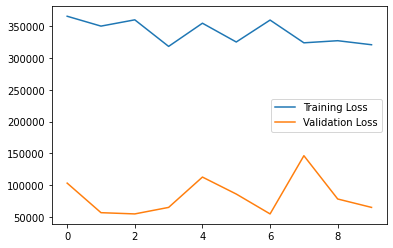

In [9]:
# Now let's train our network!
train_network_regression(mlp, train_loader, test_loader)

Great work! Go back and try different activation and output functions throughout and see how it affects your results.